In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt



from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import(
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,

)

# make plots a bit larger by default

plt.rcParams['figure.figsize'] = (7, 5)

In [3]:
#Create a small synthetic dataset

data = {
    'Weather':['Sunny','Rainy','Sunny','Sunny','Rainy','Rainy','Sunny','Rainy'],
    'Windy':  [0,        1,     0,      1,      0,      1,      0,      1     ],
    'Play' :  [1,        0,     1,      1,      0,      0,      1,      0     ]
}

df_synthetic = pd.DataFrame(data)
df_synthetic

,Weather,Windy,Play
0,Sunny,0,1
1,Rainy,1,0
2,Sunny,0,1
3,Sunny,1,1
4,Rainy,0,0
5,Rainy,1,0
6,Sunny,0,1
7,Rainy,1,0


In [4]:
#Encode catagorical feature and prepare x,y

df_synthetic['Weather_num'] = df_synthetic['Weather'].map({'Sunny':1,'Rainy':0})

X_synthetic = df_synthetic[['Weather_num','Windy']]
y_synthetic = df_synthetic['Play']

print(X_synthetic)
print(y_synthetic)


   Weather_num  Windy
0            1      0
1            0      1
2            1      0
3            1      1
4            0      0
5            0      1
6            1      0
7            0      1
0    1
1    0
2    1
3    1
4    0
5    0
6    1
7    0
Name: Play, dtype: int64


In [5]:
#train a simple decision tree

tree_syn = DecisionTreeClassifier(max_depth=3,random_state=42)
tree_syn.fit(X_synthetic,y_synthetic)
tree_syn

DecisionTreeClassifier(max_depth=3, random_state=42)

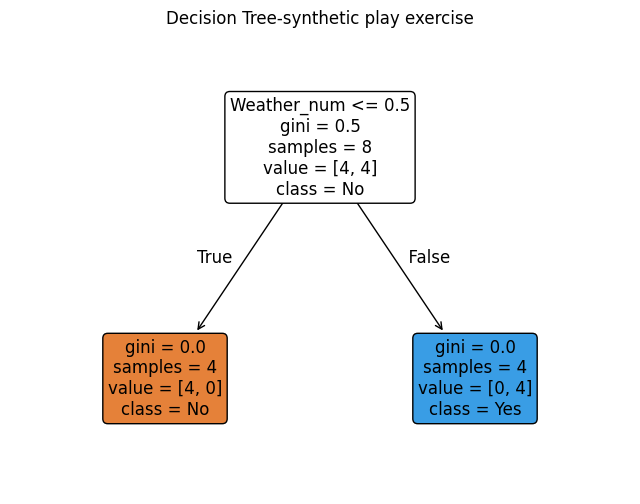

In [6]:
#visulization the tree

plt.figure(figsize=(8,6))
plot_tree(
    tree_syn,
    feature_names=['Weather_num','windy'],
    class_names=['No','Yes'],

    filled = True,
    rounded = True,
    fontsize = 12
)

plt.title("Decision Tree-synthetic play exercise")
plt.show()

Quick prediction examples


In [7]:
#example : sunny(1),not windy(0)
example_1 = pd.DataFrame([[1,0]],columns=['Weather_num','Windy'])
pred_1 = tree_syn.predict(example_1)[0]
print('sunny and not windy: ',pred_1)

#example:Rainy(0),windy(1)
example_2 = pd.DataFrame([[0,1]],columns=['Weather_num','Windy'])
pred_2 = tree_syn.predict(example_2)[0]
print('rainy and not windy: ',pred_2)

sunny and not windy:  1
rainy and not windy:  0


In [8]:
#create a slightly larger synthetic dataset

from sklearn.datasets import make_classification

X_big,y_big = make_classification(

    n_samples=400,#total data points
    n_features=5,#Total features number
    n_informative=3,#total relavent features
    n_redundant=0,#No Strong correalation among the features
    n_classes=2,# Target variable/features class number
    random_state=42,#Every time we will get the similar random dataset
)

X_train_big,X_test_big,y_train_big,y_test_big = train_test_split(
    X_big,y_big,test_size=0.3,random_state=42
)

X_train_big.shape,X_test_big.shape

((280, 5), (120, 5))

In [9]:
#Train a deep tree vs a preuned tree
deep_tree = DecisionTreeClassifier(random_state=42)
deep_tree.fit(X_train_big,y_train_big)

pruned_tree = DecisionTreeClassifier(max_depth=3,random_state=42)
pruned_tree.fit(X_train_big,y_train_big)

y_train_pred_deep = deep_tree.predict(X_train_big)
y_test_pred_deep = deep_tree.predict(X_test_big)

y_train_pred_pruned = pruned_tree.predict(X_train_big)
y_test_pred_pruned = pruned_tree.predict(X_test_big)

print ('Deep tree - train accuracy:', round(accuracy_score(y_train_big,y_train_pred_deep),3))
print ('Deep tree - test accuracy:', round(accuracy_score(y_test_big,y_test_pred_deep),3))
print()
print ('pruned tree - train accuracy:',round(accuracy_score(y_train_big,y_train_pred_pruned),3))
print ('pruned tree - test accuracy:',round(accuracy_score(y_test_big,y_test_pred_pruned),3))

Deep tree - train accuracy: 1.0
Deep tree - test accuracy: 0.883

pruned tree - train accuracy: 0.904
pruned tree - test accuracy: 0.892


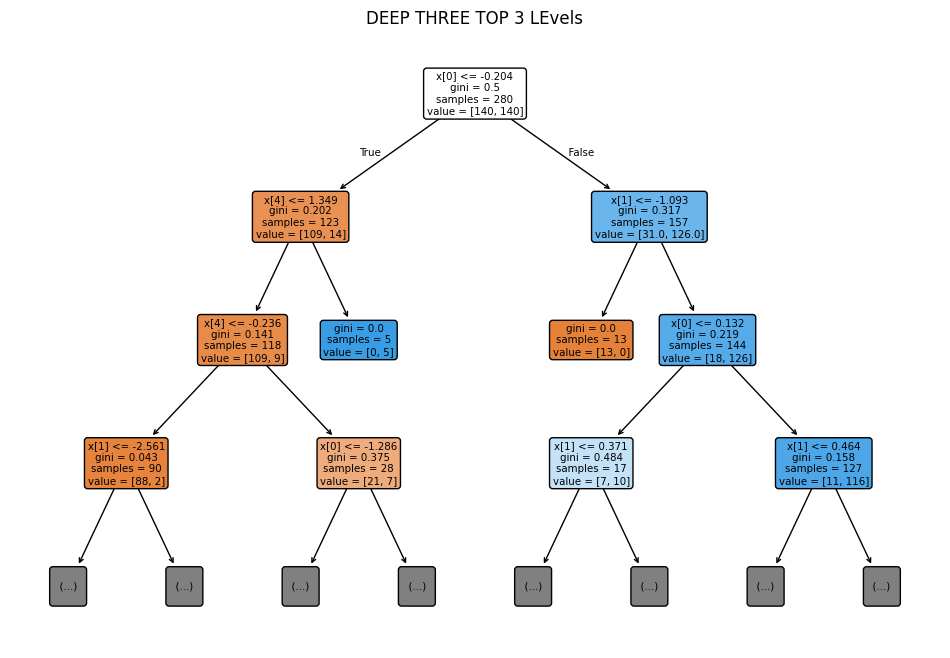

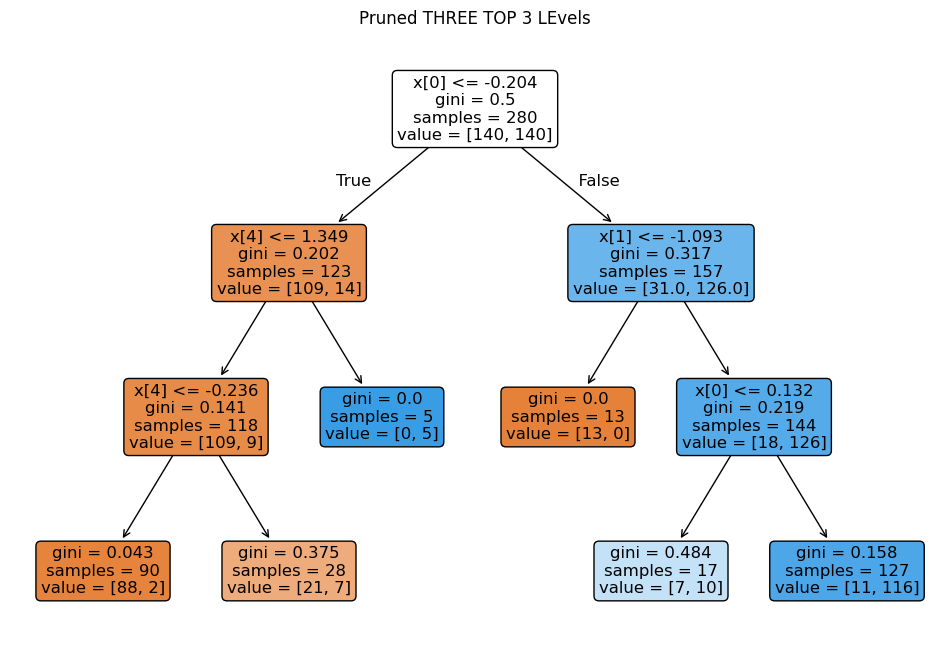

In [10]:
#plot deep tree

plt.figure(figsize=(12,8))

plot_tree(deep_tree,filled=True,rounded=True,max_depth=3)
plt.title("DEEP THREE TOP 3 LEvels")
plt.show()

#plot pruned

plt.figure(figsize=(12,8))

plot_tree(pruned_tree,filled=True,rounded=True,max_depth=3)
plt.title("Pruned THREE TOP 3 LEvels")
plt.show()

In [11]:
#Evaluating a Decision Tree (Accuracy, Precision, Recall, F1, Confusion Matrix)

np.random.seed(42)
n_samples = 300

age = np.random.randint(30,80,size=n_samples)

chol = np.random.randint(150,300,size=n_samples)

thalach = np.random.randint(90,200,size=n_samples)

#we create a simple rule-based probability for disrase just for realism

risk_score = 0.03 * (age - 40) + 0.02 * (chol - 200) - 0.02 * (thalach - 140)

prob = 1/(1+np.exp(-0.05*risk_score))

target = (prob>np.median(prob)).astype(int)

df_heart = pd.DataFrame({
    'age':age,
    'chol':chol,
    'thalach':thalach,
    'target':target
})
df_heart.head(10)


,age,chol,thalach,target
0,68,253,128,1
1,58,233,90,1
2,44,261,92,1
3,72,248,166,1
4,37,242,181,0
5,50,295,151,1
6,68,277,152,1
7,48,259,114,1
8,52,231,145,0
9,40,203,122,0


In [12]:
#train-test split and model training

X_heart = df_heart[['age','chol','thalach']]
y_heart = df_heart['target']

X_train_h,X_test_h,y_train_h,y_test_h = train_test_split(
    X_heart,y_heart,test_size=0.2,random_state=42
)

tree_heart = DecisionTreeClassifier(max_depth=4,random_state=42)
tree_heart.fit(X_train_h,y_train_h)

tree_heart



DecisionTreeClassifier(max_depth=4, random_state=42)

In [13]:
#Confusion matrix

y_pred_h = tree_heart.predict(X_test_h)

conf_matrix = confusion_matrix(y_test_h,y_pred_h)
print(conf_matrix)

[[23  3]
 [ 6 28]]


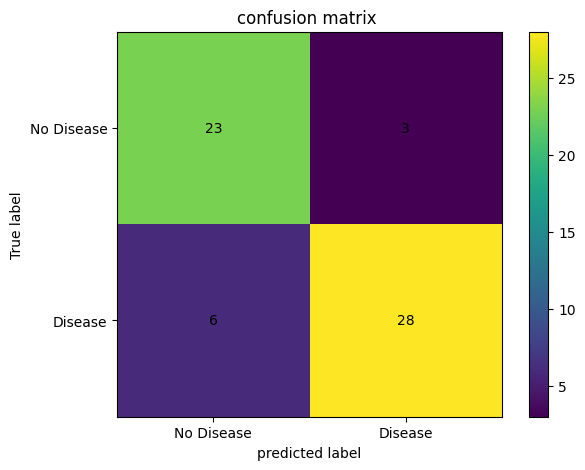

In [14]:
#plot of confusion matrix

fig, ax = plt.subplots()

im = ax.imshow(conf_matrix,interpolation='nearest')
ax.set_title("confusion matrix ")

ax.set_xlabel("predicted label")
ax.set_ylabel("True label")

#show all tricks and label them
ax.set_xticks([0,1])
ax.set_yticks([0,1])

ax.set_xticklabels(["No Disease","Disease"])
ax.set_yticklabels(["No Disease","Disease"])

#loop over data dimensions and create text annotations

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
      ax.text(j,i,conf_matrix[i,j],ha = 'center',va = 'center')


plt.colorbar(im)
plt.show()

In [15]:
#accuracy,precision,recall,,F1

acc = accuracy_score(y_test_h,y_pred_h)
prec= precision_score(y_test_h,y_pred_h)
rec = recall_score(y_test_h,y_pred_h)
f1 = f1_score(y_test_h,y_pred_h)
print('Accuracy:', round(acc,3))
print('Precision:', round(prec,3))
print('Recall:', round(rec,3))
print('F1 score:', round(f1,3))


Accuracy: 0.85
Precision: 0.903
Recall: 0.824
F1 score: 0.862


Is this model missing many disease cases?(look at reccall)

is this falsely alarming many healthy patients?(look at precision )

Does F1 look balanced?

In [16]:
#predicted probabilities

y_proba_h = tree_heart.predict_proba(X_test_h)[:,1]

y_proba_h[:10]

array([0.875     , 0.        , 0.04761905, 0.        , 0.875     ,
       1.        , 1.        , 1.        , 1.        , 0.        ])

In [17]:
#Roc curve and AUC

fpr,tpr,thresholds = roc_curve(y_test_h,y_proba_h)
roc_auc = auc(fpr,tpr)
print('AUC:',round(roc_auc,3))



AUC: 0.925


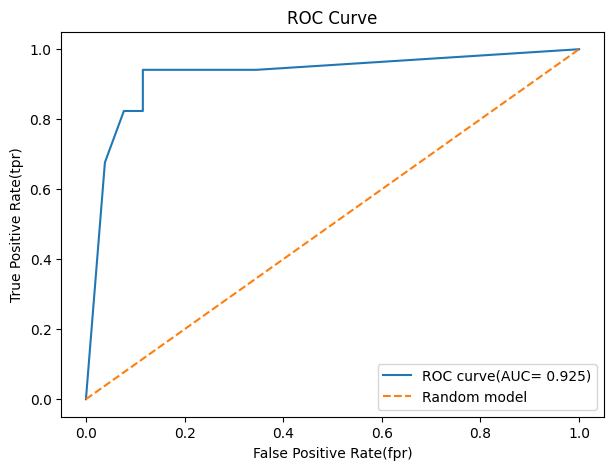

In [18]:
#plot

plt.figure()

plt.plot(fpr,tpr,label=f'ROC curve(AUC={roc_auc: .3f})')

plt.plot([0,1],[0,1],linestyle='--',label = 'Random model')

plt.xlabel('False Positive Rate(fpr)')
plt.ylabel('True Positive Rate(tpr)')
plt.title('ROC Curve')
plt.legend()
plt.show()